In [190]:
from rake_nltk import Rake
import re
import string
import pandas as pd

train = pd.read_csv('Flowster_Topic_Attributes_20200612000804.csv')

train = train[['Topic Title', 'Category', 'Tags', 'Author', 'Commenters',\
               'Leading Comment', 'Other Comments', 'Likes', 'Replies','Views']]

In [191]:
print('Rows x Columns : ', train.shape[0], 'x', train.shape[1])
print('Features: ', train.columns.tolist())
print('\nUnique values:')
print(train.nunique())

# My interpretation of the data:
#1. The Forum's discussion is generated by a group of active individuals
#rather than a general populartion because there are only 82 unique authors for the 261 topics.
#2. About 12.31% of non response rate for each post(calculated by (260-216-12)/260)), 
#so it is a relatively active Forum.

Rows x Columns :  261 x 10
Features:  ['Topic Title', 'Category', 'Tags', 'Author', 'Commenters', 'Leading Comment', 'Other Comments', 'Likes', 'Replies', 'Views']

Unique values:
Topic Title        261
Category            12
Tags                35
Author              88
Commenters         108
Leading Comment    260
Other Comments     216
Likes               12
Replies             17
Views              145
dtype: int64


In [192]:
train.info()
train.dropna(inplace=True) #drop any null values
print('\nMissing values:  ', train.isnull().sum().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
Topic Title        261 non-null object
Category           261 non-null object
Tags               261 non-null object
Author             261 non-null object
Commenters         261 non-null object
Leading Comment    260 non-null object
Other Comments     261 non-null object
Likes              261 non-null int64
Replies            261 non-null int64
Views              261 non-null int64
dtypes: int64(3), object(7)
memory usage: 20.5+ KB

Missing values:   0


In [193]:
train.describe().T

# My interpretation of the data:
#1. Viewers seldomly like posts
#2. Some posts have a lot more views than others. Views are spread very unevenly.

,count,mean,std,min,25%,50%,75%,max
Likes,260.0,1.319231,2.346857,0.0,0.00,1.0,2.00,19.0
Replies,260.0,2.780769,4.038666,0.0,1.00,2.0,3.00,51.0
Views,260.0,167.807692,126.395414,0.0,106.75,151.5,216.25,736.0


In [194]:
# Count of posts for each tag
train['Tags'].value_counts()

# Maybe it will be better to link the tags with the category so that we know which tag belongs to which category.
# But after mannually checking, the top 3 tags: 'Free SOPs'belongs to 'Flowster-specific',
#'All Other Amazon Related Issues'to 'Amazon-specific', and 'Shipping' to 'Fulfillment'

[]                                     116
['Free SOPs']                           18
['All Other Amazon Related Issues']     13
['Shipping']                            12
['Sourcing Brand Name Products']        12
['Updates']                             11
['Inventory Management']                11
['Managing a Virtual Team']              9
['PPC']                                  8
['Leadership']                           5
['Marketplace']                          5
['Accounting & Bookkeeping']             4
['Reviews & Customer Service']           3
['Shopify']                              3
['Vendor Relations']                     3
['Recruiting']                           3
['Email Marketing']                      3
['Vendor Management']                    3
['Pricing & Negotiation']                2
['Project Management']                   2
['Outsourcing']                          1
['YouTube']                              1
['All Other Traffic Sources']            1
['Pricing M

In [195]:
# Want to get views and number of commenters for each category

Flowster-specific             59
Amazon Specific               53
Product Sourcing              53
Human Resources               21
Fulfillment                   17
Management                    15
Software & Tools              14
Misc Topics                   10
Traffic Sources                8
Financial Management           7
eCommerce Marketplaces         2
Store & Website Management     1
Name: Category, dtype: int64


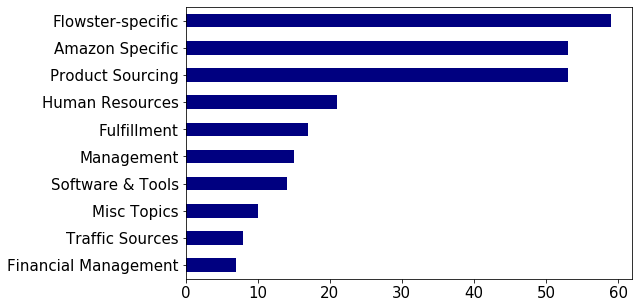

In [196]:
# Count of posts for each Category
print(train['Category'].value_counts())
# Graph of posts for each Category
train['Category'].value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

# My interpretation of the data:
# Flowster-specific, Amazon Specific, and Product Sourcing are far more active than other categories.

Kane           38
Trent-Admin    25
Laura          22
LizD           20
Mitch          17
               ..
watson          1
Ivan            1
wppfug          1
Kevin           1
lklar           1
Name: Author, Length: 88, dtype: int64


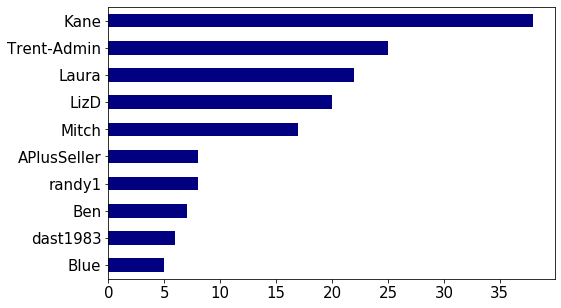

In [197]:
print(train['Author'].value_counts())
# Active Author
train['Author'].value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

# My interpretation of the data:
# There are a few very active individuals who contribute to the activity more than others.

In [198]:
train['word_count'] = train['Leading Comment'].apply(lambda x: len(str(x).split(" ")))
train[['Leading Comment','word_count']].head()

,Leading Comment,word_count
0,Have questions about sourcing products? This i...,23
1,Hi! We are new to the forum and are going thro...,63
2,As I am working in Amazon as a seller from las...,81
3,"Does anyone have a VA they recommend, have use...",16
4,Can you sell branded products on Amazon Uk or ...,15


In [199]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# number of stopwords
train['stopwords'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Leading Comment','stopwords']].head()

,Leading Comment,stopwords
0,Have questions about sourcing products? This i...,10
1,Hi! We are new to the forum and are going thro...,28
2,As I am working in Amazon as a seller from las...,23
3,"Does anyone have a VA they recommend, have use...",7
4,Can you sell branded products on Amazon Uk or ...,6


In [200]:
# number of numerics of '@'
train['hastags'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train[['Leading Comment','hastags']].head()

,Leading Comment,hastags
0,Have questions about sourcing products? This i...,0
1,Hi! We are new to the forum and are going thro...,0
2,As I am working in Amazon as a seller from las...,0
3,"Does anyone have a VA they recommend, have use...",0
4,Can you sell branded products on Amazon Uk or ...,0


In [201]:
# number of numerics
train['numerics'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Leading Comment','numerics']].head()

,Leading Comment,numerics
0,Have questions about sourcing products? This i...,0
1,Hi! We are new to the forum and are going thro...,0
2,As I am working in Amazon as a seller from las...,2
3,"Does anyone have a VA they recommend, have use...",0
4,Can you sell branded products on Amazon Uk or ...,0


In [202]:
#Pre-processing

In [203]:
def data_processing(name_of_column):
    # Making words lowercase
    train[name_of_column]=train[name_of_column].apply(lambda x: x.lower())
    # Remove digits and words that contains digits
    train[name_of_column]=train[name_of_column].apply(lambda x: re.sub('\w*\d\w*','', x))
    # Remove extra spaces
    train[name_of_column]=train[name_of_column].apply(lambda x: re.sub(' +',' ',x))
    # Remove punctuations from comments
    train[name_of_column] = train[name_of_column].str.replace('[^\w\s]','')
    # Remove stop words
    train[name_of_column] = train[name_of_column].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    #Remove rare words
    freq = pd.Series(' '.join(train[name_of_column]).split()).value_counts()[-10:]
    freq = list(freq.index)
    train[name_of_column] = train[name_of_column].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    train[name_of_column].head()
    #Remove common words
    freq = pd.Series(' '.join(train[name_of_column]).split()).value_counts()[:10]
    freq = list(freq.index)
    train[name_of_column] = train[name_of_column].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    train[name_of_column].head()

    # Importing spacy
    import spacy
    import en_core_web_sm
    nlp = en_core_web_sm.load()
    # Lemmatization with stopwords removal
    train['lemmatized '+ name_of_column]=train[name_of_column].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
    
# Cleaning data
data_processing('Leading Comment')
data_processing('Topic Title')
train.head()

,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Replies,Views,word_count,stopwords,hastags,numerics,lemmatized Leading Comment,lemmatized Topic Title
0,sourcing,Product Sourcing,[],Trent-Admin,[],questions sourcing category please sure select...,[],0,0,0,23,10,0,0,question source category sure select appropria...,source
1,price checker competitor storefront extraction,Product Sourcing,[],Mitch,['MoniqueAndKerry'],hi new forum going sourcing professionals sops...,['Yes you will need the paid version. Options...,1,2,38,63,28,0,0,hi new forum go source professional sop questi...,price checker competitor storefront extraction
2,top tips grow business rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],working seller last years tips selling growing...,[],0,0,0,81,23,0,2,work seller year tip sell grow business fastly...,tip grow business rapidly
3,virtual assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",anyone va recommend used currently using requi...,['@McDavid Most don’t want to share any stella...,0,3,156,16,7,0,0,va recommend currently require work,virtual assistant
4,sell branded products uk,Product Sourcing,['Sourcing Brand Name Products'],Rameksuya,['Mitch'],sell branded uk must com,['You can sell on Amazon UK as well. It could...,0,1,78,15,6,0,0,sell brand uk com,sell branded product uk


In [204]:
###Start of getting the word graphs for different categories###

train_grouped=train[['Category','lemmatized Leading Comment', \
                     'lemmatized Topic Title']].groupby(by='Category').agg(lambda x: ' '.join(x))

# to combine 4 lists (4 columns) of key words into 1 sentence under Bag_of_words column
train_grouped['Bag_of_words'] = ''
columns = ['lemmatized Leading Comment', 'lemmatized Topic Title']

for index, row in train_grouped.iterrows():
    words = ''
    for col in columns:
        words += ''.join(row[col]) + ' '
    row['Bag_of_words'] = words
    
# strip white spaces infront and behind, replace multiple whitespaces (if any)
train_grouped['Bag_of_words'] = train_grouped['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')
train_grouped

,lemmatized Leading Comment,lemmatized Topic Title,Bag_of_words
Category,,,
Amazon Specific,question marketplace category sure select appr...,specific get positive review increase conversi...,question marketplace category sure select appr...
Financial Management,question financial management category sure se...,financial management cashback card non citizen...,question financial management category sure se...
Flowster-specific,discussion flowster forums organization improv...,flowsterspecific welcome flowster community wo...,discussion flowster forums organization improv...
Fulfillment,question fulfillment category sure select appr...,fulfillment supply holiday fba warehouse deadl...,question fulfillment category sure select appr...
Human Resources,question human resource category sure select a...,human resource revseller training find contact...,question human resource category sure select a...
Management,question management category sure select appro...,management cheap way send money philippine eft...,question management category sure select appro...
Misc Topics,question thing not fall category category sure...,misc topics fulfillment service canadian selle...,question thing not fall category category sure...
Product Sourcing,question source category sure select appropria...,source price checker competitor storefront ext...,question source category sure select appropria...
Software & Tools,question software tool category sure select ap...,software tool hubspot change adjust order item...,question software tool category sure select ap...


In [205]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(train_grouped['Bag_of_words'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=train_grouped.index
df_dtm.head()

,abandon,ability,able,absolutely,accept,access,accord,account,accountable,accrue,...,yelle,yes,yesterday,yo,youtube,zap,zapier,zaps,zero,zoom
Category,,,,,,,,,,,,,,,,,,,,,
Amazon Specific,0,0,1,0,0,1,0,19,1,0,...,0,0,0,0,0,0,0,0,0,0
Financial Management,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Flowster-specific,3,0,3,0,0,2,1,18,0,0,...,0,0,0,0,1,1,2,0,0,0
Fulfillment,0,0,1,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
Human Resources,0,1,2,0,1,3,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0


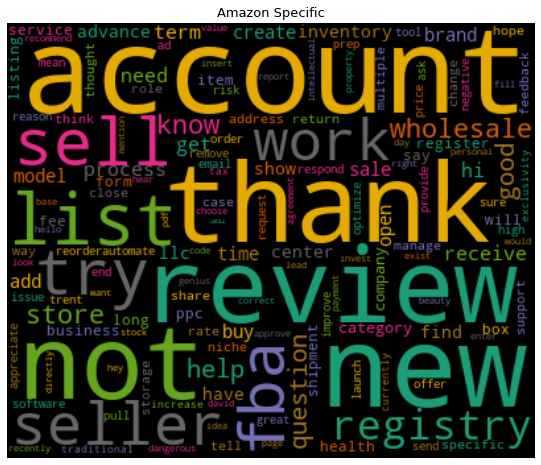

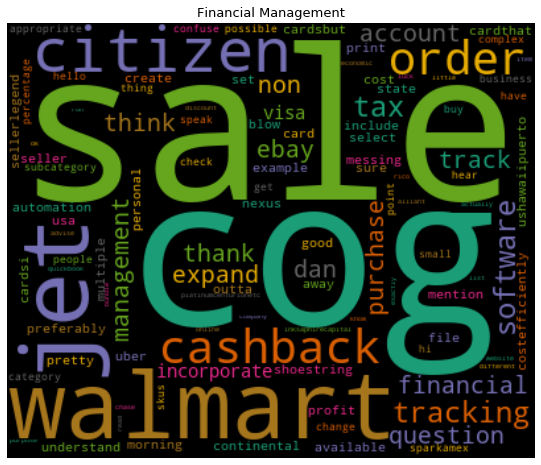

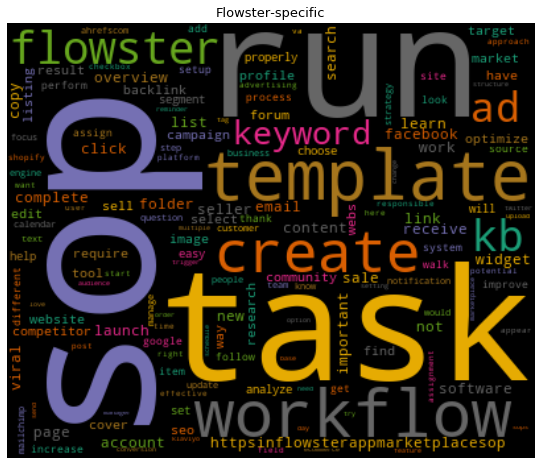

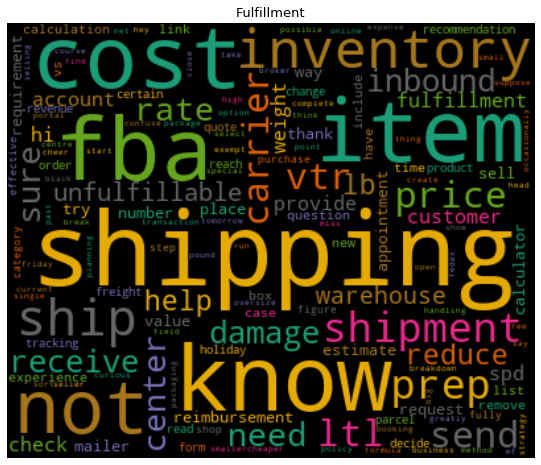

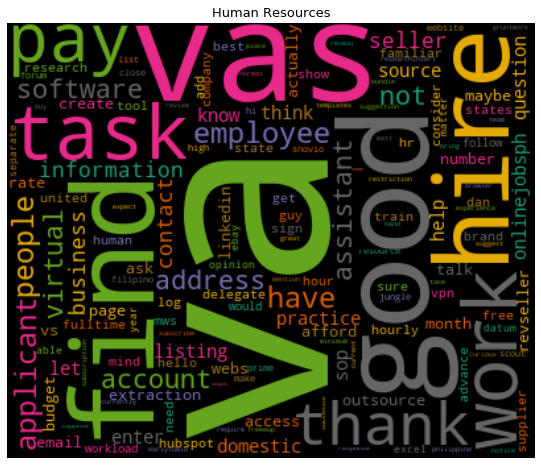

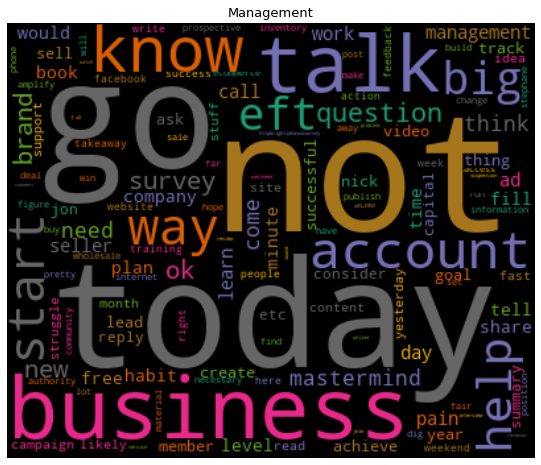

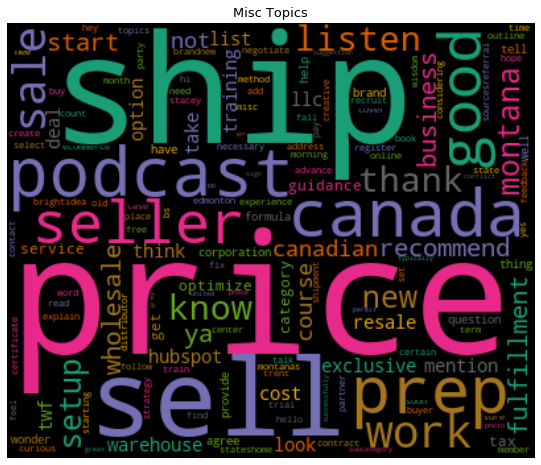

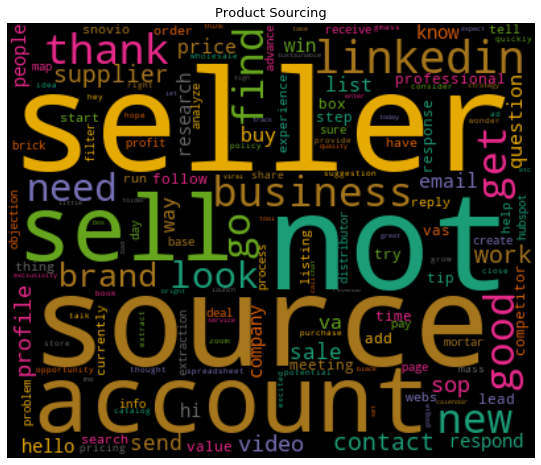

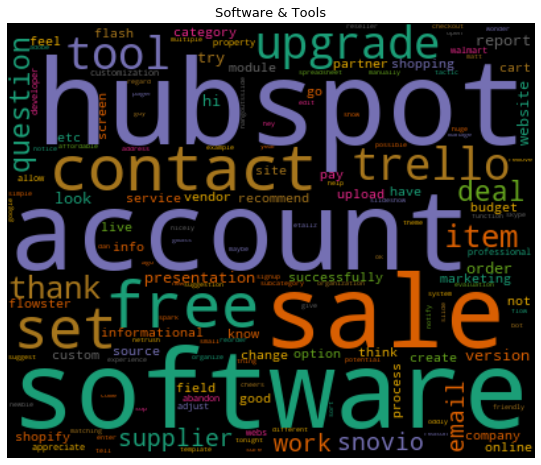

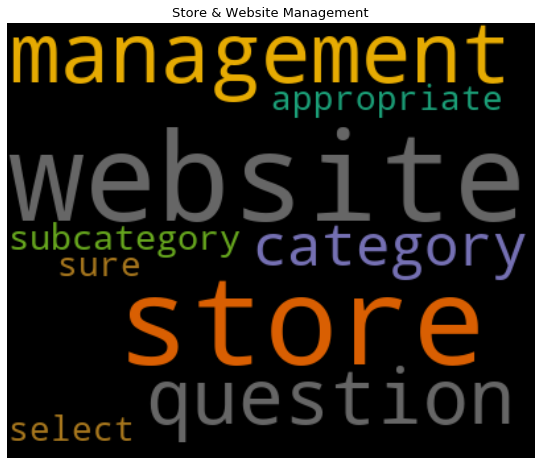

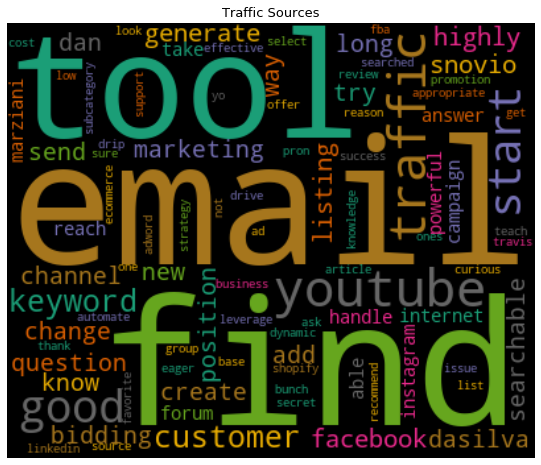

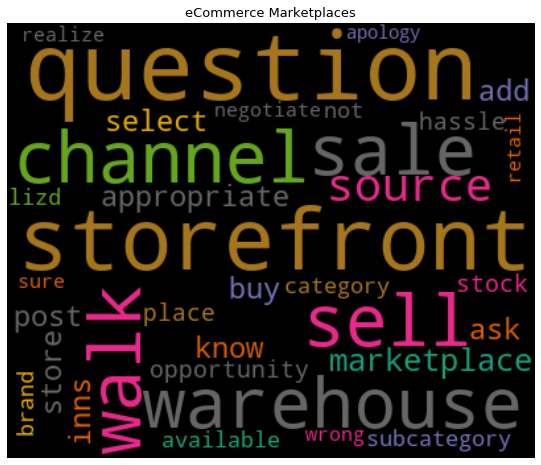

In [206]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
from matplotlib import pyplot as plt
# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
# Transposing document term matrix
df_dtm=df_dtm.transpose()
# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

# My interpretation of the data:
# The graphs shows the frequently occured words in each category. 
# It might give some insight into what each topic is about, and why some attracts more discussions than the others.
# But currently I can't get much information from these graphs.

###End of getting the word graphs for different categories###

In [211]:
###Start of getting the word graphs for popular posts and unpopular posts###
train['rank_replies'] = train['Replies'].rank()
train['rank_views'] = train['Views'].rank()
train

,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Replies,Views,word_count,stopwords,hastags,numerics,lemmatized Leading Comment,lemmatized Topic Title,rank_replies,rank_views,Key_words
0,sourcing,Product Sourcing,[],Trent-Admin,[],questions sourcing category please sure select...,[],0,0,0,23,10,0,0,question source category sure select appropria...,source,21.5,21.5,
1,price checker competitor storefront extraction,Product Sourcing,[],Mitch,['MoniqueAndKerry'],hi new forum going sourcing professionals sops...,['Yes you will need the paid version. Options...,1,2,38,63,28,0,0,hi new forum go source professional sop questi...,price checker competitor storefront extraction,136.5,43.0,
2,top tips grow business rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],working seller last years tips selling growing...,[],0,0,0,81,23,0,2,work seller year tip sell grow business fastly...,tip grow business rapidly,21.5,21.5,
3,virtual assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",anyone va recommend used currently using requi...,['@McDavid Most don’t want to share any stella...,0,3,156,16,7,0,0,va recommend currently require work,virtual assistant,180.0,134.5,
4,sell branded products uk,Product Sourcing,['Sourcing Brand Name Products'],Rameksuya,['Mitch'],sell branded uk must com,['You can sell on Amazon UK as well. It could...,0,1,78,15,6,0,0,sell brand uk com,sell branded product uk,77.5,46.5,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,tracking cogs,Financial Management,['Accounting & Bookkeeping'],LizD,"['APlusSeller', 'WT_Organics', 'terrifetters',...",hello anyone advise track profits cogs prefera...,['We use Seller Legend to track COGS for Amazo...,4,5,333,46,21,0,0,hello advise track profit cog preferably track...,tracking cog,222.5,239.0,
257,software,Financial Management,['Accounting & Bookkeeping'],Trent-Admin,"['BetterLifeSales', 'Mitch', 'jims']",accounting software everyone ive using quickbo...,['@jims We use Xero 5. They are pretty solid....,3,3,226,20,6,0,0,account software have quickbook online ok exac...,software,180.0,201.0,
258,sales channels marketplaces,eCommerce Marketplaces,[],Trent-Admin,[],questions sourcing various sales channels avai...,[],0,0,0,29,12,0,0,question source sale channel available categor...,sale channel marketplace,21.5,21.5,
259,storefront question,eCommerce Marketplaces,[],Laura,['scottschmitz'],posting wrong place apologies front lizd would...,['@scottschmitz we would be able to do transac...,0,3,196,96,40,1,0,post wrong place apology lizd know walk storef...,storefront question,180.0,185.0,


In [212]:
# Only Error pieces underneath

In [208]:
# Group into popular and not popular posts
popular = train.groupby('Replies').filter(lambda x:x['Replies'] > 4).reset_index(drop=True)
popular.head()

TypeError: filter function returned a Series, but expected a scalar bool

In [209]:
train['rank_replies'].value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

KeyError: 0.0

In [210]:
# to extract key words from Leading Comments to a list
train['Key_words'] = ''   # initializing a new column
r = Rake()   # use Rake to discard stop words (based on english stopwords from NLTK)

for index, row in train.iterrows():
    #if 
    r.extract_keywords_from_text(str(row['Leading Comment']))   # to extract key words from Plot, default in lower case
    key_words_dict_scores = r.get_word_degrees()    # to get dictionary with key words and their scores
    row['Key_words'] = list(key_words_dict_scores.keys()) # to assign list of key words to new column

train.tail()


,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Replies,Views,word_count,stopwords,hastags,numerics,lemmatized Leading Comment,lemmatized Topic Title,rank_replies,rank_views,Key_words
256,tracking cogs,Financial Management,['Accounting & Bookkeeping'],LizD,"['APlusSeller', 'WT_Organics', 'terrifetters',...",hello anyone advise track profits cogs prefera...,['We use Seller Legend to track COGS for Amazo...,4,5,333,46,21,0,0,hello advise track profit cog preferably track...,tracking cog,222.5,239.0,
257,software,Financial Management,['Accounting & Bookkeeping'],Trent-Admin,"['BetterLifeSales', 'Mitch', 'jims']",accounting software everyone ive using quickbo...,['@jims We use Xero 5. They are pretty solid....,3,3,226,20,6,0,0,account software have quickbook online ok exac...,software,180.0,201.0,
258,sales channels marketplaces,eCommerce Marketplaces,[],Trent-Admin,[],questions sourcing various sales channels avai...,[],0,0,0,29,12,0,0,question source sale channel available categor...,sale channel marketplace,21.5,21.5,
259,storefront question,eCommerce Marketplaces,[],Laura,['scottschmitz'],posting wrong place apologies front lizd would...,['@scottschmitz we would be able to do transac...,0,3,196,96,40,1,0,post wrong place apology lizd know walk storef...,storefront question,180.0,185.0,
260,store website management,Store & Website Management,[],Kane,[],questions store website management category pl...,[],0,0,0,25,10,0,0,question store website management category sur...,store website management,21.5,21.5,
